# Visualization


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from visualization import *

- Load Data

In [2]:
load_date = '200501'
data = 'secuprint'
process = 'cleaned'
path = './dataset/02_raw_cleaned/{}_{}_{}.csv'.format(load_date, data, process)

df = pd. read_csv(path)
df.head()


,user_id,department,type,filename,datetime,ip,color,page,copy,paper_size,result,file_ext_fromend,date,year,month,day,hour,weeknum,working_day
0,ys04,analyst,PRINT,C:\Users\yslee\Downloads\(서식) 계정신청서_개인.pdf,2019-05-28 17:43:18,172.16.11.41,bnw,1,1,A3,completed,pdf,2019-05-28,2019,5,28,17,1,working_day
1,ys04,analyst,PRINT,C:\Users\yslee\Downloads\(서식) 계정신청서_개인.pdf,2019-05-28 17:43:20,172.16.11.41,bnw,1,1,A3,completed,pdf,2019-05-28,2019,5,28,17,1,working_day
2,ys04,analyst,PRINT,C:\Users\yslee\Downloads\(서식) 정보보호서약서_개인.pdf,2019-05-28 17:43:24,172.16.11.41,bnw,2,1,A5,completed,pdf,2019-05-28,2019,5,28,17,1,working_day
3,ys04,analyst,PRINT,C:\Users\yslee\Downloads\(서식) 정보보호서약서_대표자.pdf,2019-05-28 17:43:28,172.16.11.41,bnw,2,1,A3,completed,pdf,2019-05-28,2019,5,28,17,1,working_day
4,ys04,analyst,PRINT,C:\Users\yslee\Downloads\(서식) 정보보호서약서_개인.pdf,2019-05-28 17:53:41,172.16.11.41,bnw,2,1,A4,completed,pdf,2019-05-28,2019,5,28,17,1,working_day


- set style

In [12]:
sns.set()
import matplotlib.pylab as pylab
params = {'figure.figsize': (15, 5),
          'lines.linewidth': 5,
          'axes.grid': True,
          'axes.titlesize':'x-large',
          'legend.loc': 'best',
          'xtick.labelsize':'large',
          'ytick.labelsize':'medium',
          'axes.titlesize': 24,
          'axes.labelsize': 20
          }
pylab.rcParams.update(params)

## 1. Single Continous - Histogram

/home/centos/anaconda3/envs/dasom_pt1.4_tf2.0/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/centos/anaconda3/envs/dasom_pt1.4_tf2.0/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/centos/anaconda3/envs/dasom_pt1.4_tf2.0/lib/python3.6/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/

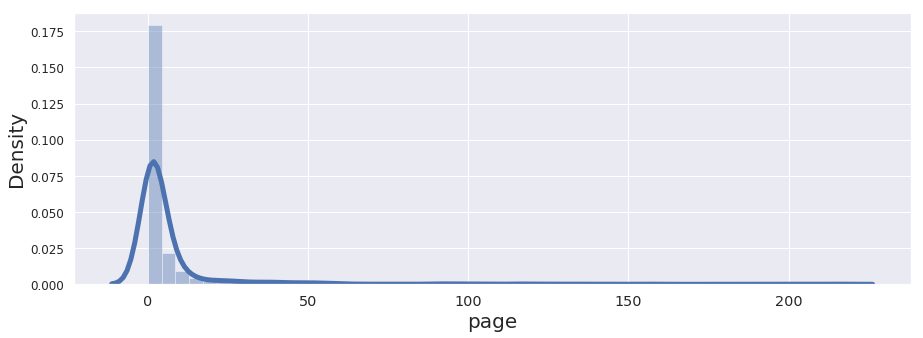

In [13]:
fig, ax = plt.subplots()
sns_hist(df['page'], bins=50, kde=True, hist_kws={"log":False})

# #-- customizing
# ax.set(xlabel="change x_label", ylabel="change y_label", title="change title", 
#        xlim=(0, 40))

- Example: Histogram Subplots

[Text(0, 0.5, 'change y_label'), (0, 100), Text(0.5, 0, 'change x_label')]

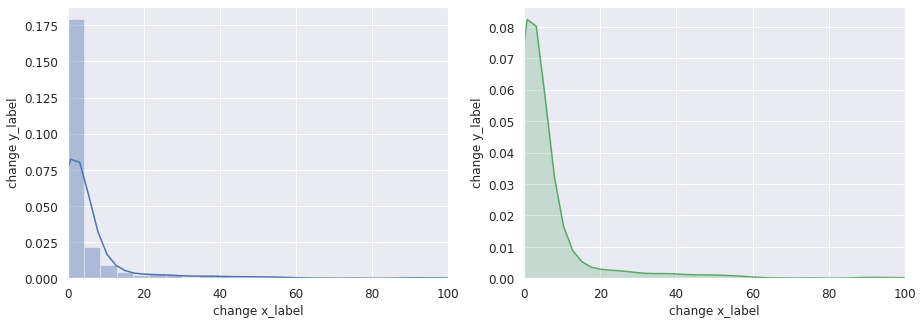

In [5]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False)

sns_hist(df['page'], bins=50, kde=True,
        hist_kws={"log":False},
        ax=ax0)

sns_hist(df['page'], hist=False,
        hist_kws={"log":False},
        kde_kws={"color":"g", 'shade': True}, ax=ax1)

ax0.set(xlabel="change x_label", ylabel="change y_label", xlim=(0, 100))
ax1.set(xlabel="change x_label", ylabel="change y_label", xlim=(0, 100))

## 2. Single Continous - Boxplot

[(-10, 40)]

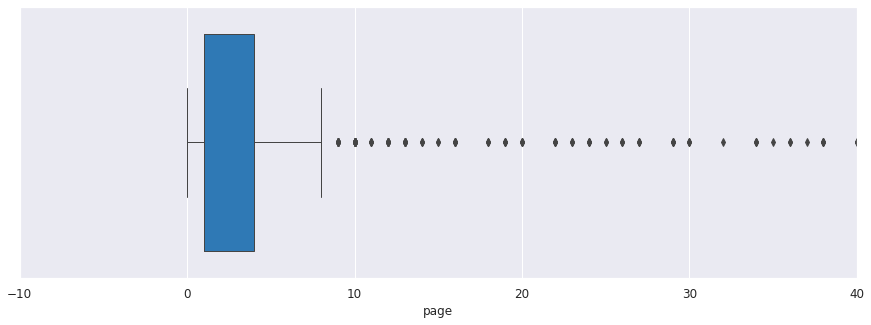

In [6]:
fig, ax = plt.subplots()
sns_boxplot('page', data=df, ax=ax)
ax.set(xlim=(-10,40))

[(0, 40), Text(0.5, 1.0, 'Two Variable Boxplot')]

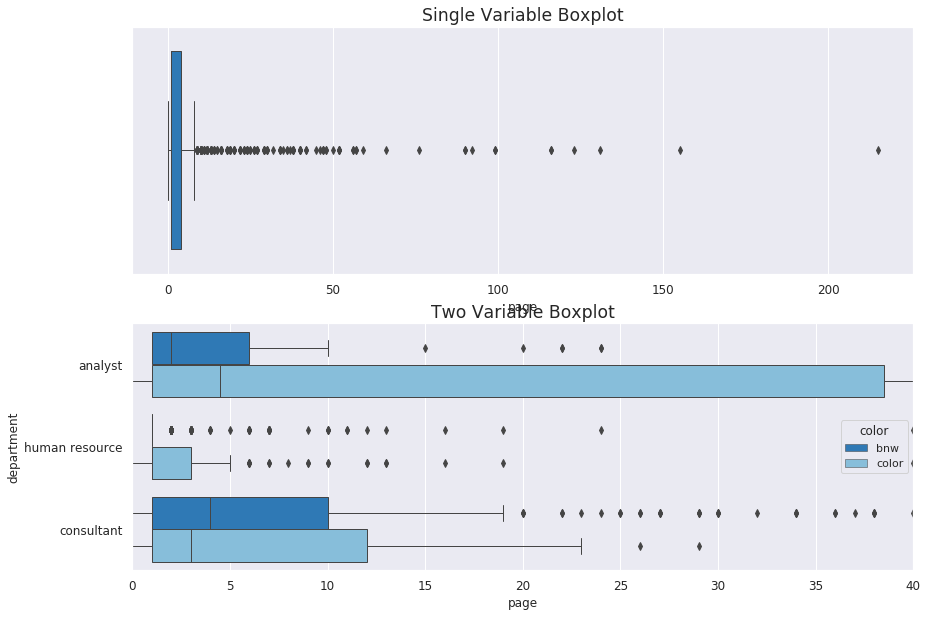

In [7]:
fig, (ax0,ax1) = plt.subplots(figsize=(14,10), nrows=2)

# mnc_palette = ["#0F5BA3", "#3787C0", "#6AADD5", "#ABCFE5", "#D6E5F4"]
sns_boxplot(x='page', data=df, ax=ax0)
sns_boxplot(x='page', y='department', data=df, hue='color', ax=ax1, whis=True)

# customizing
ax0.set(title="Single Variable Boxplot")
ax1.set(title="Two Variable Boxplot", xlim=(0, 40))

## 3. Single Categorical- Countplot

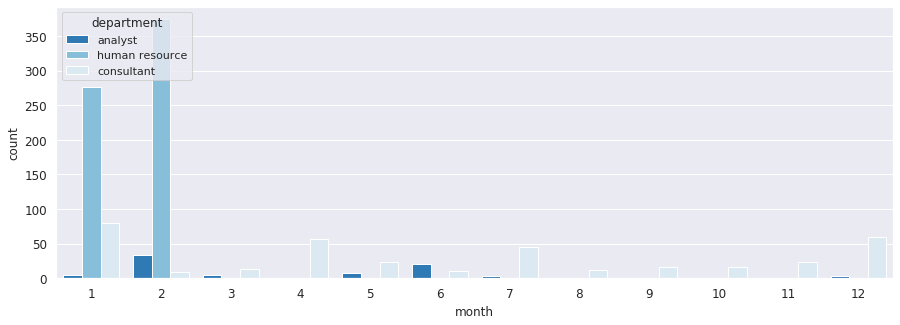

In [8]:
sns_countplot("month", df, hue='department')

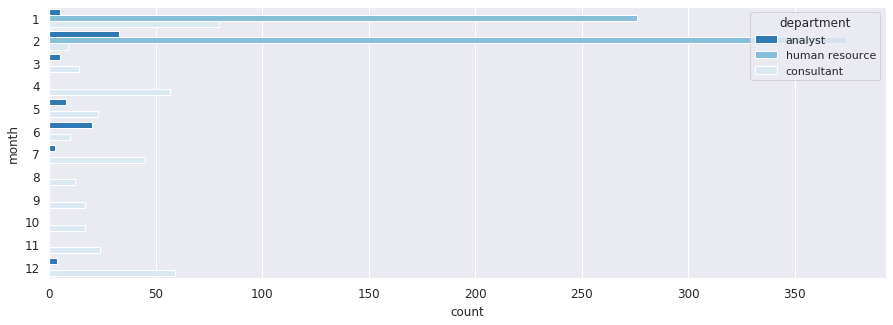

In [9]:
sns_countplot_hor("month", df, hue='department')

## 4. Scatter_Line Plot

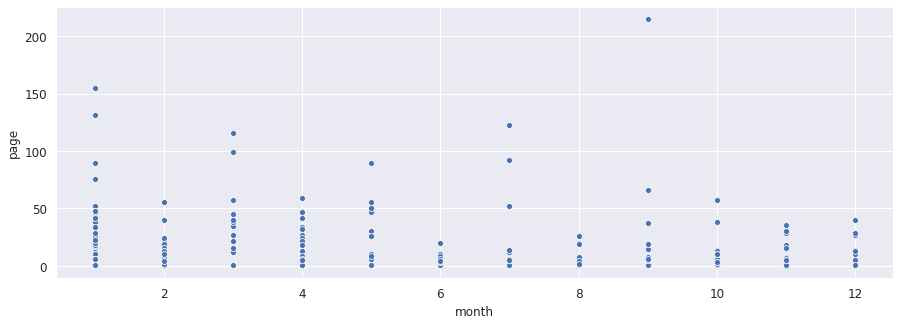

In [10]:
sns_scatter(x="month", y="page", data=df)

/home/centos/anaconda3/envs/dasom/lib/python3.6/site-packages/seaborn/relational.py:1651: UserWarning: relplot is a figure-level function and does not accept target axes. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


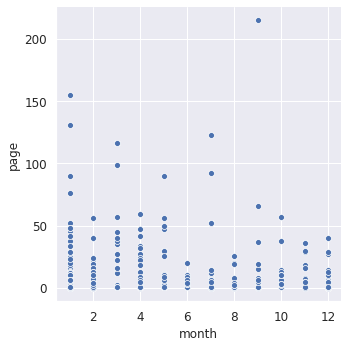

In [11]:
sns_relplot(x="month", y="page", data=df)